# **Capstone UAS : Bengkel Koding (Data Science - DS01)**
Nama : Sherina Nur Anggraeni <br>
NIM  : A11.2022.14374 <br>
Link : https://colab.research.google.com/drive/1mp2XGePWRtMOm3yfJi9SOf5zOnLFieaO?usp=sharing <br>
Github : https://github.com/SherinaNA/CapstoneUAS_BengKod

##**1. Exploratory Data Analysis (EDA)**

In [ ]:
# Import Library
import pandas as pd # untuk melakukan manipulasi, analisis, dan visualisasi data
import numpy as np # NumPy menyediakan berbagai fungsi untuk melakukan operasi numerik
import matplotlib.pyplot as plt # untuk visualisasi data
import seaborn as sns # library yang dibangun di atas Matplotlib

In [ ]:
# Menghubungkan gdrive dengan colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Membaca dataset pada gdrive
df = pd.read_csv('/content/drive/MyDrive/BengkelKoding/CapstoneUAS/ObesityDataSet.csv')
df.head(5)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
# Ubah nama kolom (agar mudah dibaca)
df.rename(columns={
    'Gender': 'Gender',
    'Age'   : 'Age',
    'Height': 'Height',
    'Weight': 'Weight',
    'family_history_with_overweight': 'FamilyHistoryOverweight',
    'FAVC'  : 'HighCalorieFood',
    'FCVC'  : 'VegetableConsumption',
    'NCP'   : 'MealFrequency',
    'CAEC'  : 'SnackConsumption',
    'SMOKE' : 'Smoking',
    'CH2O'  : 'WaterIntake',
    'SCC'   : 'CalorieMonitoring',
    'FAF'   : 'PhysicalActivity',
    'TUE'   : 'TechnologyUse',
    'CALC'  : 'AlcoholConsumption',
    'MTRANS': 'Transportation',
    'NObeyesdad': 'ObesityLevel'
}, inplace=True)

# Menampilkan 5 data dengan nama kolom baru
df.head(10)

,Age,Gender,Height,Weight,AlcoholConsumption,HighCalorieFood,VegetableConsumption,MealFrequency,CalorieMonitoring,Smoking,WaterIntake,FamilyHistoryOverweight,PhysicalActivity,TechnologyUse,SnackConsumption,Transportation,ObesityLevel
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
5,29,Male,1.62,53,Sometimes,yes,2,3,no,no,2,no,0,0,Sometimes,Automobile,Normal_Weight
6,23,Female,1.5,55,Sometimes,yes,3,3,no,no,2,yes,1,0,Sometimes,Motorbike,Normal_Weight
7,22,Male,1.64,53,Sometimes,no,2,3,no,no,2,no,3,0,Sometimes,Public_Transportation,Normal_Weight
8,24,Male,1.78,348.49777557852735,Frequently,yes,3,3,no,no,2,yes,1,1,Sometimes,Public_Transportation,Normal_Weight
9,22,Male,1.72,68,no,yes,2,3,no,no,2,yes,1,1,Sometimes,Public_Transportation,Normal_Weight


- sekilas masih tampak dan terdapat nilai yang outlier

In [ ]:
# Menampilkan Informasi umum dari dataset
df.info()

# Deskripsi statistik data numerik
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      2097 non-null   object
 1   Gender                   2102 non-null   object
 2   Height                   2099 non-null   object
 3   Weight                   2100 non-null   object
 4   AlcoholConsumption       2106 non-null   object
 5   HighCalorieFood          2100 non-null   object
 6   VegetableConsumption     2103 non-null   object
 7   MealFrequency            2099 non-null   object
 8   CalorieMonitoring        2101 non-null   object
 9   Smoking                  2106 non-null   object
 10  WaterIntake              2105 non-null   object
 11  FamilyHistoryOverweight  2098 non-null   object
 12  PhysicalActivity         2103 non-null   object
 13  TechnologyUse            2102 non-null   object
 14  SnackConsumption         2100 non-null  

,Age,Gender,Height,Weight,AlcoholConsumption,HighCalorieFood,VegetableConsumption,MealFrequency,CalorieMonitoring,Smoking,WaterIntake,FamilyHistoryOverweight,PhysicalActivity,TechnologyUse,SnackConsumption,Transportation,ObesityLevel
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


- type data masih berupa object semua (harus diubah menjadi bentuk kategorikal, numerik, dll)
- dataset masih memuat missing values (nan, ?, dll)
- masih ada fitur dengan yang memiliki nilai unique yang belum tepat (gender 3 nilai unique, dll)

In [ ]:
# Cek missing values
df.isnull().sum()

,0
Age,14
Gender,9
Height,12
Weight,11
AlcoholConsumption,5
HighCalorieFood,11
VegetableConsumption,8
MealFrequency,12
CalorieMonitoring,10
Smoking,5


- jumlah data dengan nilai missing value pada setiap fitur

In [ ]:
# Cek unique value tiap kolom
df.nunique()

,0
Age,1394
Gender,3
Height,1562
Weight,1518
AlcoholConsumption,5
HighCalorieFood,3
VegetableConsumption,808
MealFrequency,637
CalorieMonitoring,3
Smoking,3


- menampilkan jumlah nilai unique pada setiap fitur

In [ ]:
# Cek data duplikat
df.duplicated().sum()

np.int64(18)

In [ ]:
# Melihat jumlah nilai unik dan daftar nilai unik pada setiap kolom
for col in df.columns:
    print(f"\nKolom: {col}")
    print(f"Jumlah nilai unik: {df[col].nunique()}")
    print(f"Nilai unik: {df[col].unique()}")


Kolom: Age
Jumlah nilai unik: 1394
Nilai unik: ['21' '23' '27' ... '22.524036' '24.361936' '23.664709']

Kolom: Gender
Jumlah nilai unik: 3
Nilai unik: ['Female' 'Male' '?' nan]

Kolom: Height
Jumlah nilai unik: 1562
Nilai unik: ['1.62' '1.52' '1.8' ... '1.752206' '1.73945' '1.738836']

Kolom: Weight
Jumlah nilai unik: 1518
Nilai unik: ['64' '56' '77' ... '133.689352' '133.346641' '133.472641']

Kolom: AlcoholConsumption
Jumlah nilai unik: 5
Nilai unik: ['no' 'Sometimes' 'Frequently' '?' 'Always' nan]

Kolom: HighCalorieFood
Jumlah nilai unik: 3
Nilai unik: ['no' 'yes' '?' nan]

Kolom: VegetableConsumption
Jumlah nilai unik: 808
Nilai unik: ['2' '3' '1' nan '?' '8.148992744163786' '8.42397392777979' '2.450218'
 '2.880161' '2.00876' '2.596579' '2.591439' '2.392665' '1.123939'
 '2.027574' '2.658112' '2.88626' '2.714447' '2.750715' '1.4925' '2.205439'
 '2.059138' '2.310423' '2.823179' '2.052932' '2.596364' '2.767731'
 '2.815157' '2.737762' '2.524428' '2.971574' '1.0816' '1.270448'
 '1.34

In [ ]:
# Mengecek dan mengganti missing values
df.replace('?', np.nan, inplace=True)  # Mengubah '?' menjadi NaN

In [ ]:
# Replace 'no' jadi 'No' pada kolom SnackConsumption dan AlcoholConsumption
df['SnackConsumption'] = df['SnackConsumption'].replace('no', 'No')
df['AlcoholConsumption'] = df['AlcoholConsumption'].replace('no', 'No')

In [ ]:
# Melihat jumlah nilai unik dan daftar nilai unik pada setiap kolom
for col in df.columns:
    print(f"\nKolom: {col}")
    print(f"Jumlah nilai unik: {df[col].nunique()}")
    print(f"Nilai unik: {df[col].unique()}")


Kolom: Age
Jumlah nilai unik: 1393
Nilai unik: ['21' '23' '27' ... '22.524036' '24.361936' '23.664709']

Kolom: Gender
Jumlah nilai unik: 2
Nilai unik: ['Female' 'Male' nan]

Kolom: Height
Jumlah nilai unik: 1561
Nilai unik: ['1.62' '1.52' '1.8' ... '1.752206' '1.73945' '1.738836']

Kolom: Weight
Jumlah nilai unik: 1517
Nilai unik: ['64' '56' '77' ... '133.689352' '133.346641' '133.472641']

Kolom: AlcoholConsumption
Jumlah nilai unik: 4
Nilai unik: ['No' 'Sometimes' 'Frequently' nan 'Always']

Kolom: HighCalorieFood
Jumlah nilai unik: 2
Nilai unik: ['no' 'yes' nan]

Kolom: VegetableConsumption
Jumlah nilai unik: 807
Nilai unik: ['2' '3' '1' nan '8.148992744163786' '8.42397392777979' '2.450218'
 '2.880161' '2.00876' '2.596579' '2.591439' '2.392665' '1.123939'
 '2.027574' '2.658112' '2.88626' '2.714447' '2.750715' '1.4925' '2.205439'
 '2.059138' '2.310423' '2.823179' '2.052932' '2.596364' '2.767731'
 '2.815157' '2.737762' '2.524428' '2.971574' '1.0816' '1.270448'
 '1.344854' '2.959658'

- value '?' sudah diubah kebentuk nan
- value no sudah diubah kebentuk No

In [ ]:
# List semua kolom numeric yang mau dicek
numeric_cols = ['Age', 'Height', 'Weight', 'VegetableConsumption', 'MealFrequency',
                'WaterIntake', 'PhysicalActivity', 'TechnologyUse']

# Looping untuk cetak value_counts() tiap kolom
for col in numeric_cols:
    print(f"\nKolom: {col}")
    print(df[col].value_counts())


Kolom: Age
Age
18           124
26            99
21            96
23            89
19            59
            ... 
31.426573      1
34.369686      1
33.690239      1
37.496175      1
18.701766      1
Name: count, Length: 1393, dtype: int64

Kolom: Height
Height
1.7         58
1.65        50
1.6         41
1.75        39
1.62        36
            ..
1.699474     1
1.621048     1
1.560029     1
1.835678     1
1.701397     1
Name: count, Length: 1561, dtype: int64

Kolom: Weight
Weight
80           58
50           42
70           41
75           39
60           36
             ..
97.92035      1
88.431954     1
86.963628     1
84.315608     1
89.802492     1
Name: count, Length: 1517, dtype: int64

Kolom: VegetableConsumption
VegetableConsumption
3           647
2           592
1            33
2.442536      2
2.823179      2
           ... 
2.010684      1
2.300408      1
2.119643      1
2.901924      1
2.749629      1
Name: count, Length: 807, dtype: int64

Kolom: MealFrequency
MealF

In [ ]:
# Fitur kategorikal dan biner
categorical_cols = ['Gender', 'FamilyHistoryOverweight', 'HighCalorieFood', 'SnackConsumption',
                    'Smoking', 'CalorieMonitoring', 'AlcoholConsumption',
                    'Transportation', 'ObesityLevel']

for col in categorical_cols:
    df[col] = df[col].astype('category')

In [ ]:
# Fitur integer
integer_cols = ['VegetableConsumption', 'TechnologyUse', 'MealFrequency', 'WaterIntake', 'PhysicalActivity']

for col in integer_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').round().astype('Int64')

# Fitur kontinu
continuous_cols = ['Age', 'Height', 'Weight']

# Age → round ke integer
df['Age'] = pd.to_numeric(df['Age'], errors='coerce').round().astype('Int64')

# Height → 2 desimal
df['Height'] = pd.to_numeric(df['Height'], errors='coerce').round(2)

# Weight → 1 desimal
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce').round(1)


In [ ]:
# Menampilkan Informasi umum dari dataset (cek typedata setelah diganti)
df.info()

# Deskripsi statistik data numerik (setelah dilakukan perubahan)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      2089 non-null   Int64   
 1   Gender                   2089 non-null   category
 2   Height                   2089 non-null   float64 
 3   Weight                   2092 non-null   float64 
 4   AlcoholConsumption       2091 non-null   category
 5   HighCalorieFood          2089 non-null   category
 6   VegetableConsumption     2093 non-null   Int64   
 7   MealFrequency            2089 non-null   Int64   
 8   CalorieMonitoring        2093 non-null   category
 9   Smoking                  2098 non-null   category
 10  WaterIntake              2096 non-null   Int64   
 11  FamilyHistoryOverweight  2088 non-null   category
 12  PhysicalActivity         2092 non-null   Int64   
 13  TechnologyUse            2096 non-null   Int64   
 14  SnackCon

,Age,Height,Weight,VegetableConsumption,MealFrequency,WaterIntake,PhysicalActivity,TechnologyUse
count,2089.0,2089.000000,2092.000000,2093.0,2089.0,2096.0,2092.0,2096.0
mean,24.72044,1.706573,88.608174,2.449116,2.732408,2.036737,1.071224,0.686546
std,8.399528,0.117753,36.154784,0.685074,1.003207,0.800409,1.187047,0.775847
min,14.0,1.450000,39.000000,1.0,1.0,1.0,0.0,0.0
25%,20.0,1.630000,66.000000,2.0,3.0,2.0,0.0,0.0
50%,23.0,1.700000,83.000000,2.0,3.0,2.0,1.0,1.0
75%,26.0,1.770000,108.025000,3.0,3.0,2.0,2.0,1.0
max,106.0,2.850000,441.100000,9.0,12.0,9.0,12.0,8.0


In [ ]:
# List semua kolom numeric yang mau dicek setelah dibulatkan
numeric_cols = ['Age', 'Height', 'Weight', 'VegetableConsumption', 'MealFrequency',
                'WaterIntake', 'PhysicalActivity', 'TechnologyUse']

# Looping untuk cetak value_counts() tiap kolom
for col in numeric_cols:
    print(f"\nKolom: {col}")
    print(f"Jumlah nilai unik: {df[col].nunique()}")
    print(df[col].value_counts())


Kolom: Age
Jumlah nilai unik: 52
Age
21     235
23     214
26     208
18     207
19     169
22     160
20     148
24      95
25      81
17      69
31      60
30      51
27      41
33      35
38      34
29      31
34      29
32      25
37      24
39      24
28      20
41      20
35      19
16      19
40      19
36       6
42       6
44       6
55       5
45       3
43       3
46       2
51       2
88       1
52       1
61       1
56       1
94       1
15       1
14       1
89       1
97       1
99       1
103      1
105      1
48       1
47       1
106      1
91       1
92       1
96       1
101      1
Name: count, dtype: Int64

Kolom: Height
Jumlah nilai unik: 61
Height
1.70    122
1.75    120
1.62     94
1.76     93
1.65     87
       ... 
2.70      1
1.95      1
1.94      1
2.63      1
2.85      1
Name: count, Length: 61, dtype: int64

Kolom: Weight
Jumlah nilai unik: 697
Weight
80.0     62
50.0     44
70.0     42
75.0     40
60.0     37
         ..
41.4      1
49.5      1
81.4     

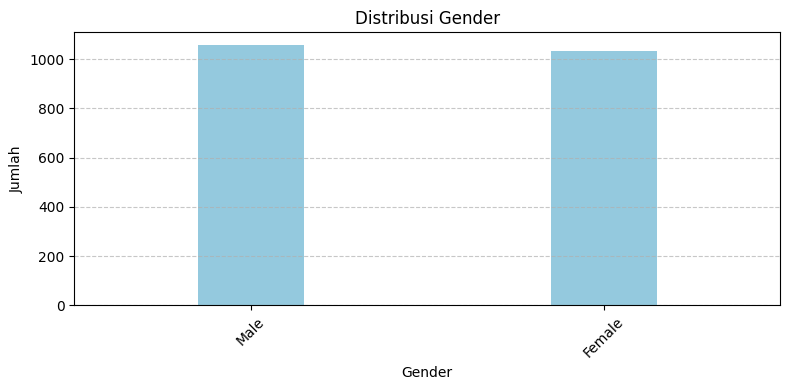

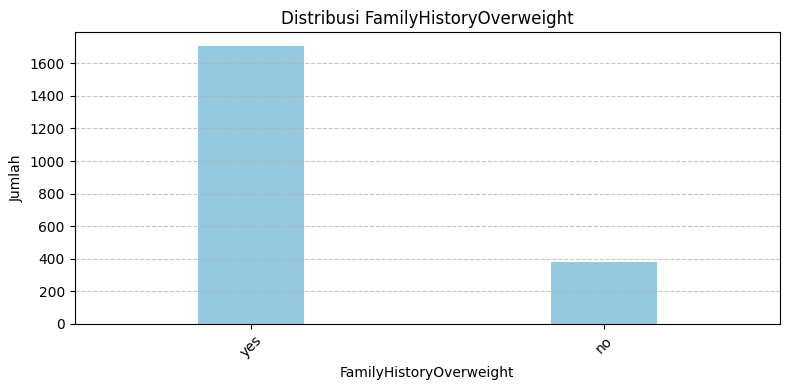

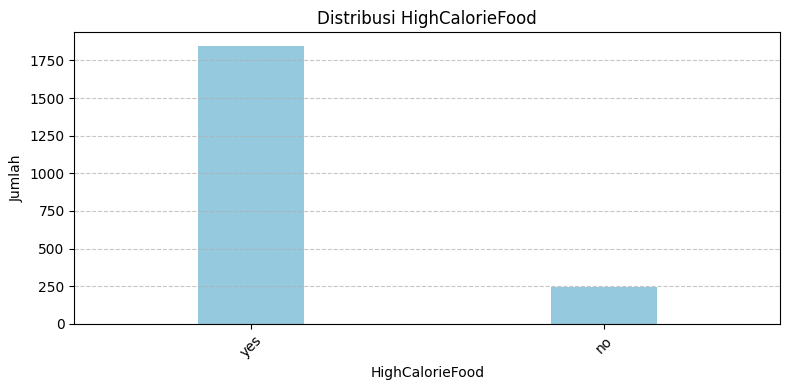

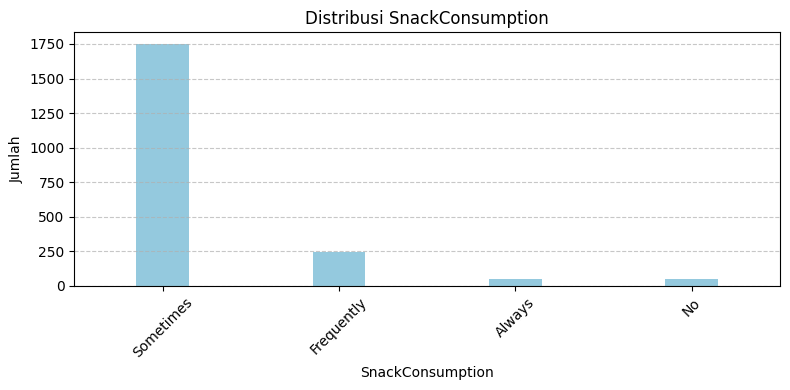

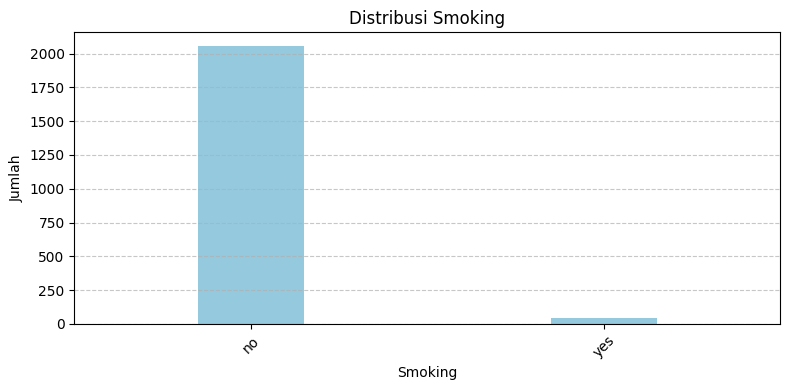

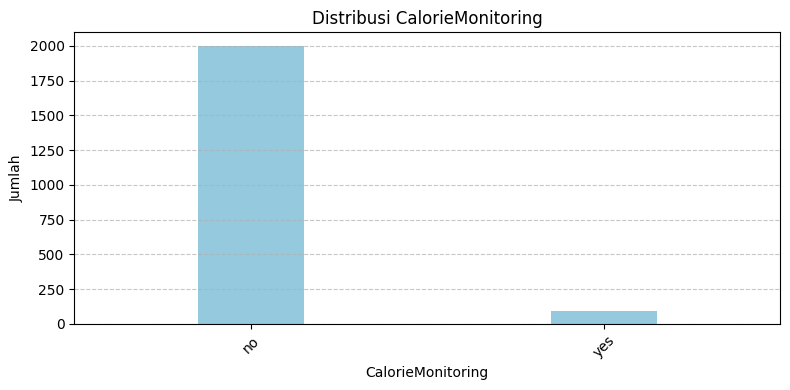

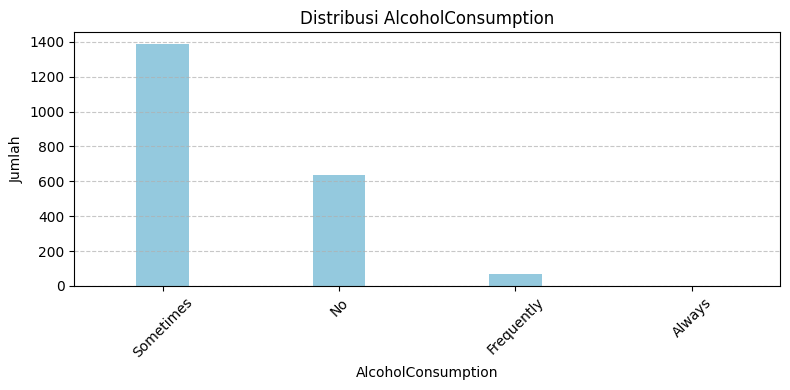

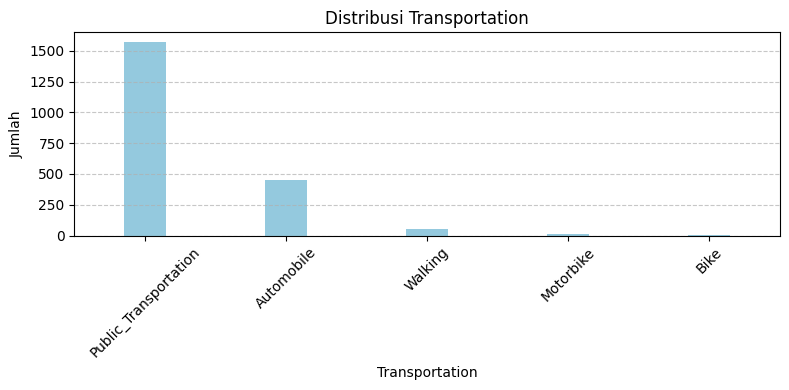

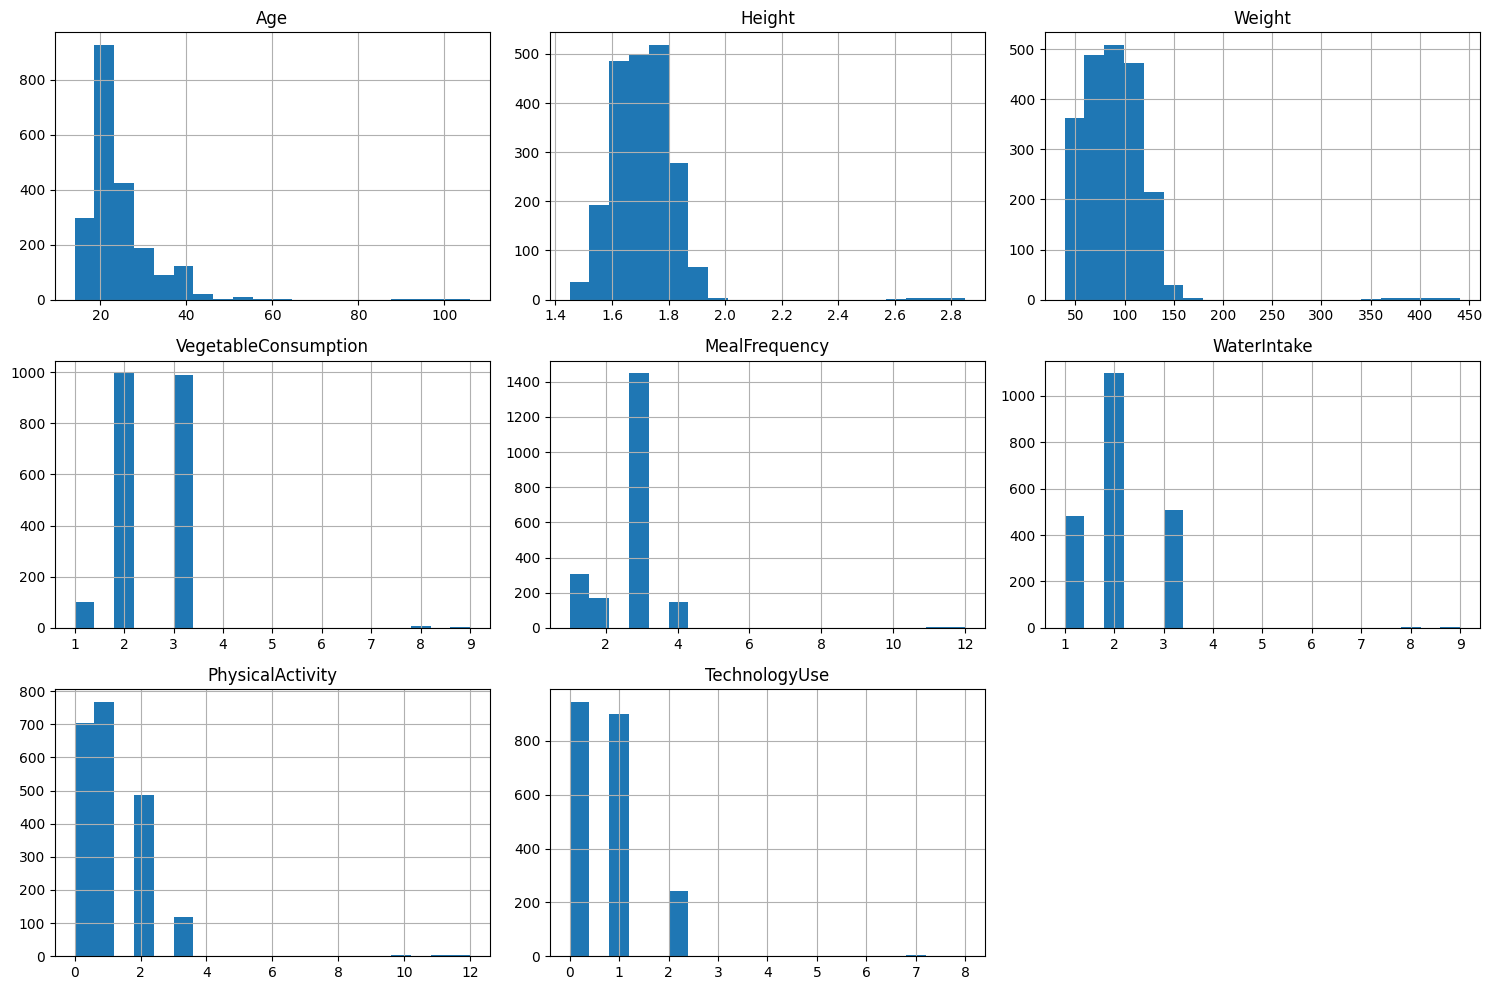

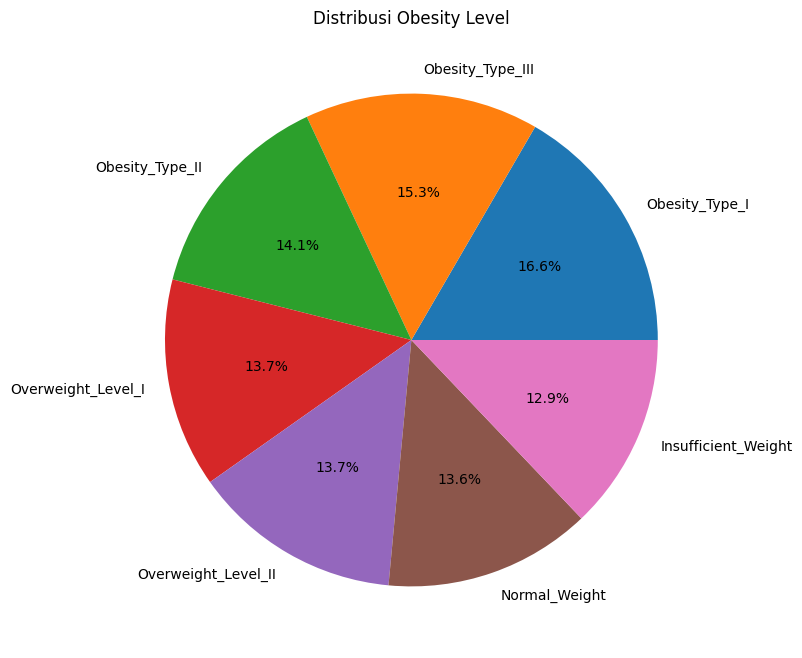

<ipython-input-73-3c3a36525dae>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


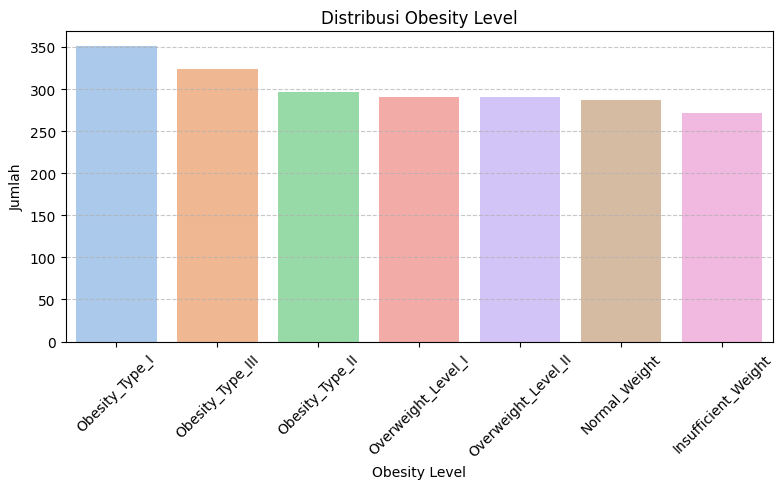

In [ ]:
# Daftar fitur kategori
categorical_cols = [
    'Gender', 'FamilyHistoryOverweight', 'HighCalorieFood', 'SnackConsumption',
    'Smoking', 'CalorieMonitoring', 'AlcoholConsumption', 'Transportation'
]

# Plot bar untuk setiap fitur kategori
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, color='skyblue', width=0.3)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Histogram untuk numeric feature
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Pie chart distribusi target
df['ObesityLevel'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Distribusi Obesity Level')
plt.ylabel('')
plt.show()

# Bar chart distribusi target
plt.figure(figsize=(8, 5))
sns.countplot(
    x='ObesityLevel',
    data=df,
    palette='pastel',  # gunakan palette agar tiap kategori beda warna
    order=df['ObesityLevel'].value_counts().index
)
plt.title('Distribusi Obesity Level')
plt.xlabel('Obesity Level')
plt.ylabel('Jumlah')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

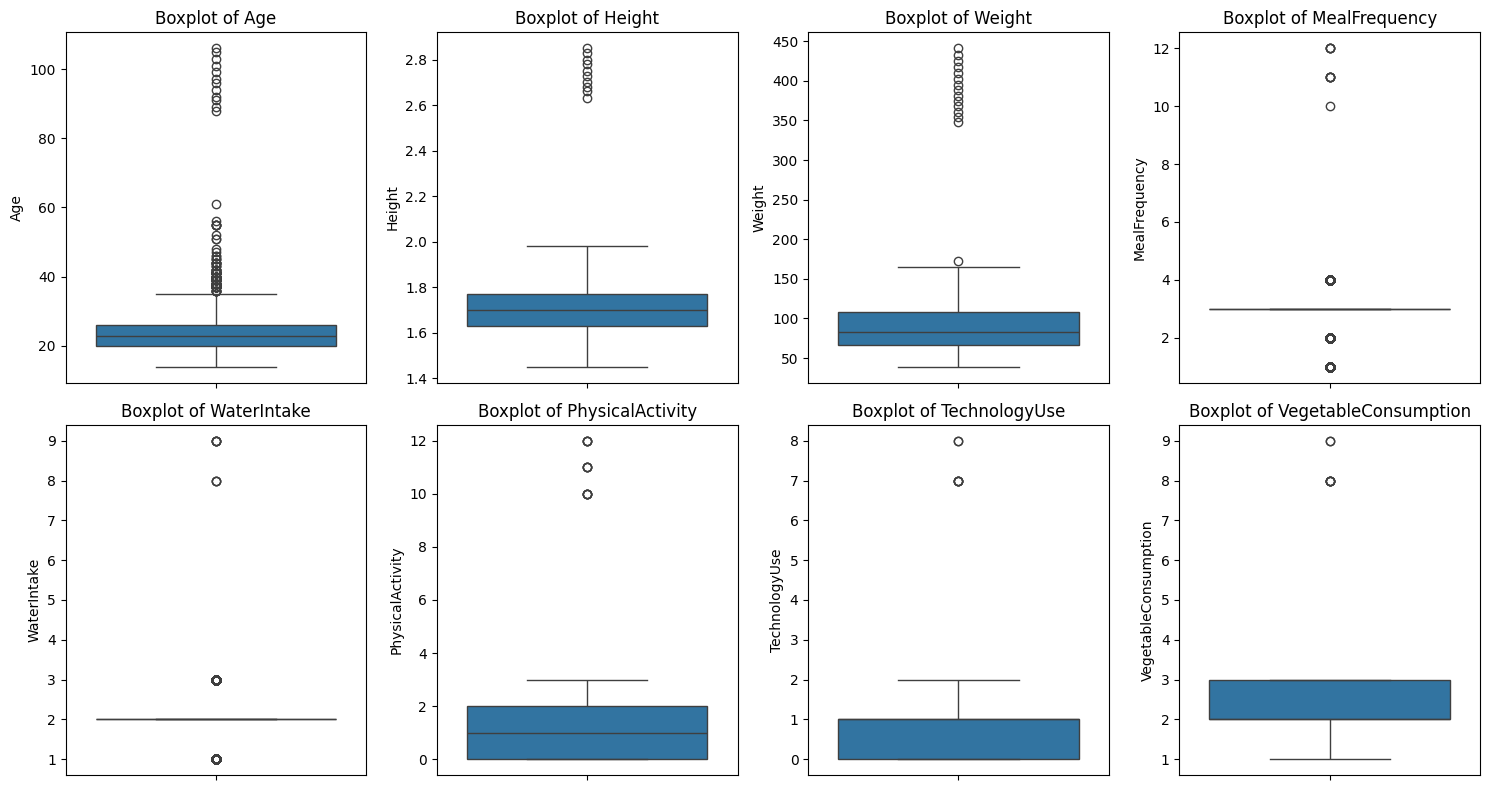

In [ ]:
# Boxplot untuk numeric feature
numeric_columns = ['Age', 'Height', 'Weight', 'MealFrequency', 'WaterIntake', 'PhysicalActivity', 'TechnologyUse', 'VegetableConsumption']

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


###**Kesimpulan dari hasil EDA (Exploratory Data Analysis)**

- Type data dan missing value => setelah dilakukkan pengecekkan menggunakan nilai unique ditemukan kolom yang mimiliki nilai '?' dan kosong (missing value), ditemukan beberapa record duplikat (18) record data, typedata awal (semula) bertype object semua, agar memudahkan untuk proses selanjutnya harus diubah terlebih dahulu ke type data sesuai dengan kebutuhan (soal)
- Beberapa fitur seperti Age, Height, Weight memiliki distribusi yang relatif normal, namun masih menunjukkan indikasi outlier
- Beberapa nilai dari masing-masing  fitur numerik memiliki nilai yang yang sangat bervariasi (banyak angka dibelakang koma) padahal seharusnya berupa bilangan bulat, harus dilakukan pembulatan sesuai dengan type data yang telah disepakati (memudahkan dalam melihat rentang nilai, untuk mengatasi outlier)
- Distribusi fitur kategorikal masih memiliki values yang inkonsisten, harus dilakukan penyesuaian unique value agar konsisten
- Distribusi Target dari hasil visualisasi dari bar chart, menunjukkan kelas target yang kurang seimbang (imbalance). Beberapa kelas seperti Obesity_Type_III lebih sedikit dibanding Normal_Weight atau Overweight_Level_I. mungkin perlu handling imbalance data (seperti oversampling, undersampling, atau SMOTE).

##**2. Preprocessing Data**

###**Kesimpulan dari hasil Preprocessing Data**

##**3. Pemodelan dan Evaluasi**

###**Kesimpulan dari hasil Pemodelan dan Evaluasi**

##**4. Hyperparameter Tuning**

###**Kesimpulan dari hasil setelah dilakukan Hyperparameter Tuning**